# Chatbot

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="Gemma2-9b-It"
)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x112be8500>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x112be8f50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start building Chatbot using LangGraph

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END, add_messages

In [7]:
class State(TypedDict):
    """
    'messages' have the type 'list' and the 'add_messages' function is used to add or 
    append messages to the 'messages' list rather than overwritting.
    """
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
print(help(graph_builder))
print(dir(graph_builder))

Help on StateGraph in module langgraph.graph.state object:

class StateGraph(langgraph.graph.graph.Graph)
 |  StateGraph(state_schema: Optional[Type[Any]] = None, config_schema: Optional[Type[Any]] = None, *, input: Optional[Type[Any]] = None, output: Optional[Type[Any]] = None) -> None
 |
 |  A graph whose nodes communicate by reading and writing to a shared state.
 |  The signature of each node is State -> Partial<State>.
 |
 |  Each state key can optionally be annotated with a reducer function that
 |  will be used to aggregate the values of that key received from multiple nodes.
 |  The signature of a reducer function is (Value, Value) -> Value.
 |
 |  Args:
 |      state_schema (Type[Any]): The schema class that defines the state.
 |      config_schema (Optional[Type[Any]]): The schema class that defines the configuration.
 |          Use this to expose configurable parameters in your API.
 |
 |
 |  Examples:
 |      >>> from langchain_core.runnables import RunnableConfig
 |      

In [8]:
def chatbot(state:State):
    return {"messages": llm.invoke(state["messages"])} 

In [9]:
graph_builder.add_node("chatbot", chatbot)

In [11]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [12]:
# ready the graph
graph = graph_builder.compile()
graph

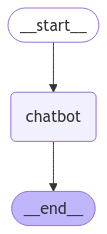

In [13]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
except Exception as e:
    print(e)

In [16]:
while True:
    user_input = input("You: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye!!!")
        break
    for event in graph.stream({"messages":("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("Assistant: ", value["messages"].content)

dict_values([{'messages': AIMessage(content="LangGraph is a fascinating project! \n\n**Essentially, it's a large-scale language model (LLM) trained by Google DeepMind that focuses on understanding the structural relationships between words in a sentence.** \n\nHere's a breakdown of its key features and significance:\n\n**1. Focus on Syntax and Structure:**\n\nUnlike many LLMs that primarily focus on predicting the next word in a sequence, LangGraph emphasizes understanding the grammatical structure of language. It learns the dependencies between words, capturing how they relate to each other in terms of subject, object, verb, and other syntactic roles.\n\n**2. Graph-Based Representation:**\n\nLangGraph uses a graph-based representation to model language. Each word is a node in the graph, and edges connect words based on their syntactic relationships. This allows the model to capture complex dependencies and hierarchical structures in sentences.\n\n**3. Powerful Performance:**\n\nLangGr